In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
   alpha_1[0]     -1.10      0.38     -1.12     -1.69     -0.50   3135.77      1.00
   alpha_2[0]     -2.46      0.26     -2.44     -2.84     -2.04   2175.02      1.00
    beta_1[0]      1.26      0.53      1.22      0.40      2.11   3013.28      1.00
    beta_2[0]      2.22      0.72      2.15      1.05      3.38   3283.33      1.00
     kappa[0]      1.90      1.19      1.92     -0.22      3.66   3793.89      1.00
   m_break[0]      8.72      1.05      8.93      7.54     10.00   1219.62      1.00
 mix_tilt1[0]      0.51      0.29      0.51      0.11      1.00   5930.45      1.00
 mix_tilt2[0]      0.57      0.26      0.58      0.20      1.00   5477.61      1.00
   mixture[0]      0.61      0.09      0.62      0.47      0.75   1265.61      1.00
   mu_chi1[0]      0.18      0.11      0.17      0.00      0.34   4304.37      1.00
   mu_chi2[0]      0.12      0.08      0.11      0.00      0.23   2897.88  

(array([  3.,   7.,  23.,  41., 102., 214., 339., 488., 668., 732., 748.,
        639., 473., 257., 146.,  80.,  23.,  11.,   3.,   3.]),
 array([-2.52098499, -2.0699277 , -1.61887041, -1.16781313, -0.71675584,
        -0.26569855,  0.18535873,  0.63641602,  1.08747331,  1.5385306 ,
         1.98958788,  2.44064517,  2.89170246,  3.34275975,  3.79381703,
         4.24487432,  4.69593161,  5.1469889 ,  5.59804618,  6.04910347,
         6.50016076]),
 <BarContainer object of 20 artists>)

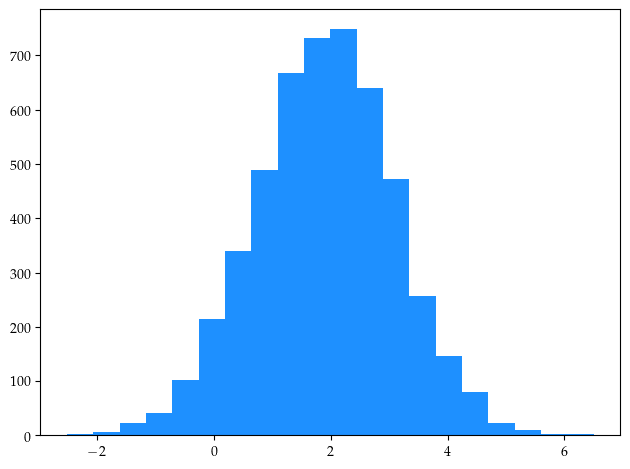

In [6]:
plt.hist(posterior_samples["kappa"], bins = 20)

In [ ]:
from config.mass1d_func import pdb_with_NG
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=pdb_with_NG)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

In [ ]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")